In [2]:
import pandas as pd
test_set = pd.read_pickle(r'C:\Users\Yaroslavel\sample\new_test_set.pkl')
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.notebook_repr_html', True)

In [3]:
test_set = pd.read_pickle(r'C:\Users\Yaroslavel\ZalevskiyDiplom\sample\new_test_set.pkl')
#test_set

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
path_to_images = 'K:/DiplomZalevskiy/data/images'
disease_labels = ['Atelectasis',
       'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema',
       'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening',
       'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']
idg = ImageDataGenerator(rescale=1./255.,
                         samplewise_center=True,
                         samplewise_std_normalization=True)

test_generator = idg.flow_from_dataframe(
    dataframe=test_set,
    directory=path_to_images,
    x_col="filename",
    y_col='array_disease',
    target_size=(128, 128),
    color_mode = 'rgb',
    class_mode='raw',
    batch_size=32,
    classes=disease_labels,
    seed=42,
    shuffle=False)

x_test, y_test = next(test_generator)

C:\Users\Yaroslavel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:930: UserWarning: `classes` will be ignored given the class_mode="raw"
  warnings.warn(


Found 19724 validated image filenames.


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img

img_path = r'K:\DiplomZalevskiy\data\images\00011003_006.png'
target_img = load_img(img_path)
target_img = np.array(target_img)
x = target_img.reshape((1,) + target_img.shape)

def show_gen_img(data_generator):
    generator = data_generator.flow(x, batch_size=1)
    plt.figure(figsize=(17,8))
    for i in range(1):
        batches = next(generator)
        gen_img = array_to_img(batches[0])
        plt.subplot(1, 4, i+1)
        plt.imshow(gen_img)
    plt.show()

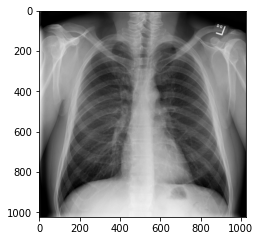

In [24]:
show_gen_img(idg)

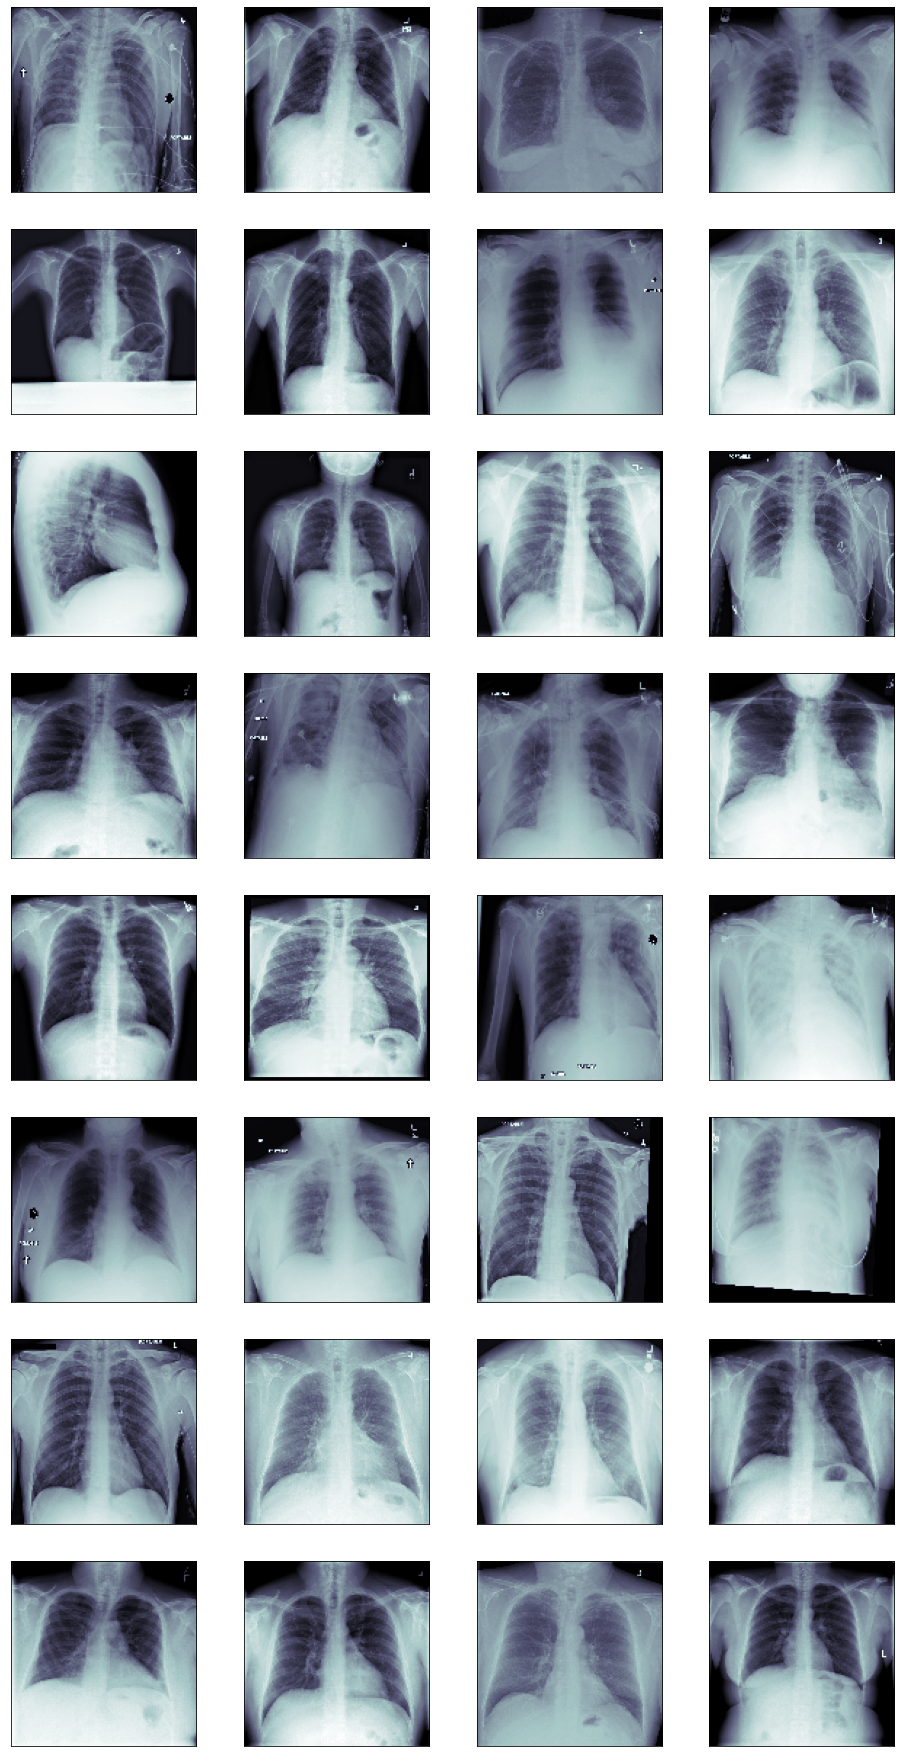

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,32))
for i in range(32):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    plt.imshow(x_test[i][:,:,0],cmap='bone')

In [9]:
#load model
from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\Yaroslavel\ZalevskiyDiplom\models\model_checkpoint.h5')

In [38]:
# Анализ предсказаний
#pred_y = model.evaluate_generator(test_generator,verbose=1)

In [40]:
# print('Test Loss:', reulsts_test[0])
# print('Test Categorical Accuray:', reulsts_test[1])
# print('Test AUC:', reulsts_test[2])

In [42]:
pred_y = model.predict_generator(test_generator, verbose = 1)

C:\Users\Yaroslavel\AppData\Local\Temp\ipykernel_6736\3956621123.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_y = model.predict_generator(test_generator, verbose = 1)


720/720 [==============================] - 257s 357ms/step


Text(0, 0.5, 'True Positive Rate')

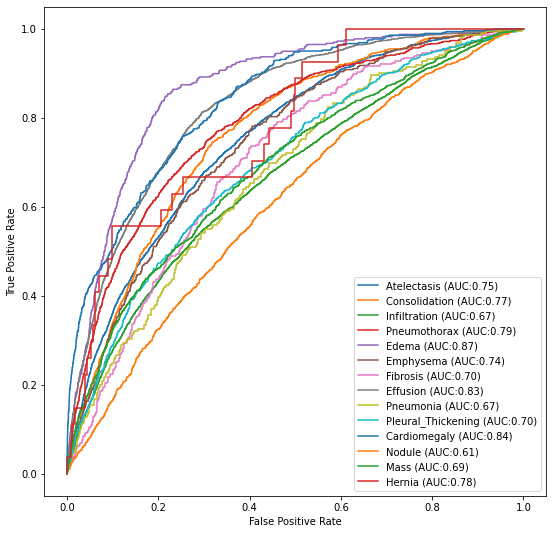

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(disease_labels):
    fpr, tpr, thresholds = roc_curve(test_generator.labels[:,idx].astype(int), pred_y[:,idx])
    #print(thresholds)
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr      = dict()
tpr      = dict()
roc_auc  = dict()

for i in range(14):
       fpr[i], tpr[i], _ = roc_curve(test_generator.labels[:,i], pred_y[:, i])
       roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(test_generator.labels.ravel(), pred_y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure(figsize = (10,8))
lw = 2
plt.plot(fpr[1],tpr[1],color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' %roc_auc[1])
plt.plot([0,1],[0,1],color = 'navy',lw = lw, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()
plt.savefig('roc-curve')

In [6]:
# всея выборка
test_generator_all_batch = idg.flow_from_dataframe(
    dataframe=test_set,
    directory=path_to_images,
    x_col="filename",
    y_col= disease_labels,
    classes=disease_labels,
    target_size=(224, 224),
    seed=42,
    class_mode='raw',
    color_mode='rgb',
    batch_size=1024) #getting al the samples


Found 19724 validated image filenames.


In [7]:
x_test, y_test = next(test_generator_all_batch)

In [48]:
len(y_test)

1024

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred = model.predict(x_test) 
y_predict_classes = np.argmax(y_pred,axis=1) 
matr = confusion_matrix(np.argmax(y_test,axis=1),y_predict_classes)
matr
#report = classification_report(y_predict_classes,np.argmax(y_test,axis=1),target_names = disease_labels)
#print('\n',report)
#plt.figure(figsize = (12, 8)) #ax= plt.subplot() 
#htmap = sns.heatmap(matr, annot=True, xticklabels = disease_labels, yticklabels=disease_labels, fmt = "d"); 
#print('\n',report)

32/32 [==============================] - 32s 1s/step


array([[ 96,  34,   0,   1,  54,   7,   0, 434,  12,  18,   6,   0,  19,
          0],
       [  2,   1,   1,   0,   9,   0,   0,  22,   2,   0,   1,   0,   0,
          0],
       [  6,   2,   1,   0,  24,   2,   0,  88,   5,   3,   2,   0,  10,
          0],
       [  1,   0,   0,   0,   3,   2,   0,   6,   0,   1,   0,   0,  16,
          0],
       [  0,   0,   0,   0,   3,   0,   0,   4,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   3,   0,   3,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,
          0],
       [  2,   2,   0,   0,  33,   0,   0,  11,   1,   0,   1,   0,   0,
          0],
       [  0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   1,   1,   0,   0,   6,   2,   0,   3,   0,   0,
          0],
       [  0,   2,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,
          0],
       [  1,   0,   0,   0,   1,   0,   0, 

In [12]:
matr

array([[ 96,  34,   0,   1,  54,   7,   0, 434,  12,  18,   6,   0,  19,
          0],
       [  2,   1,   1,   0,   9,   0,   0,  22,   2,   0,   1,   0,   0,
          0],
       [  6,   2,   1,   0,  24,   2,   0,  88,   5,   3,   2,   0,  10,
          0],
       [  1,   0,   0,   0,   3,   2,   0,   6,   0,   1,   0,   0,  16,
          0],
       [  0,   0,   0,   0,   3,   0,   0,   4,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   3,   0,   3,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,
          0],
       [  2,   2,   0,   0,  33,   0,   0,  11,   1,   0,   1,   0,   0,
          0],
       [  0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   1,   1,   0,   0,   6,   2,   0,   3,   0,   0,
          0],
       [  0,   2,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,
          0],
       [  1,   0,   0,   0,   1,   0,   0, 

<AxesSubplot:>

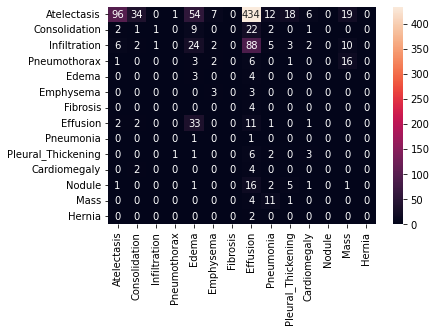

In [13]:
import seaborn as sns
sns.heatmap(matr, annot=True, xticklabels = disease_labels, yticklabels=disease_labels, fmt = "d")

In [143]:
test_set.sample(1)

,filename,disease,followup,patientID,age,gender,viewposition,width,height,x,path,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Crossed Disease,array_disease
40884,00010591_003.png,Effusion|Pneumothorax,3,10591,46,F,PA,2990,2991,0.143,K:/DiplomZalevskiy/data/images/00010591_003.png,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"


In [149]:
# предсказывание результатов
disease_classes = {i:c for i,c in enumerate(disease_labels)}
from tensorflow.keras.utils import load_img,img_to_array
image = load_img(r'K:DiplomZalevskiy/data/images/00010591_003.png',target_size=(128,128))
img_tensor = img_to_array(image)
img_tensor /= 255
img_tensor = np.expand_dims(img_tensor,axis=0)

result_label = np.argmax(model.predict(img_tensor)[0],axis=0)
#print('predicted label',disease_classes[result_label])
img_tensor

1/1 [==============================] - 0s 31ms/step


array([[[[0.18039216, 0.18039216, 0.18039216],
         [0.05882353, 0.05882353, 0.05882353],
         [0.02745098, 0.02745098, 0.02745098],
         ...,
         [0.6392157 , 0.6392157 , 0.6392157 ],
         [0.7176471 , 0.7176471 , 0.7176471 ],
         [0.83137256, 0.83137256, 0.83137256]],

        [[0.01960784, 0.01960784, 0.01960784],
         [0.01568628, 0.01568628, 0.01568628],
         [0.01568628, 0.01568628, 0.01568628],
         ...,
         [0.        , 0.        , 0.        ],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.28627452, 0.28627452, 0.28627452]],

        [[0.01568628, 0.01568628, 0.01568628],
         [0.01568628, 0.01568628, 0.01568628],
         [0.01568628, 0.01568628, 0.01568628],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784314]],

        ...,

        [[0.02352941, 0.02352941, 0.02352941],
         [0.01960784, 0.01960784, 0.01960784]